In [ ]:
import tensorflow as tf
tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()
from tensorflow import keras

#   패키지 설치
#   pip install tensorflow
#   pip install keras

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# pd.__version__    # pandas 버전
# np.__version__    # numpy 버전
# plt.__version__   # matplotlib 버전

# (영화 IMDB)데이터
데이터: 50000개
- 긍정 리뷰: 25000개
- 부정 리뷰: 25000개

### 데이터 분할(훈련 + 테스트)

In [ ]:
from tensorflow.keras.datasets import imdb

(xtrain_all, ytrain_all), (xtest, ytest) = imdb.load_data(
    num_words=500)

# 정보
print(xtrain_all.shape, xtest.shape)    # (훈련/테스트 데이터 샘플 갯수, 특성 갯수)

print( xtrain_all[0] )  # 첫 번째 리뷰 토큰
print(len(xtrain_all[0]))  # 첫 번째 리뷰 토큰 개수
print( ytrain_all[0:20] )  # 타겟 - 0: 부정, 1: 긍정

17464789/17464789 [==============================] - 2s 0us/step
(25000,) (25000,)
[1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 2, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]
218
[1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1]


### 데이터 분할(훈련 + 검증)

In [ ]:
from sklearn.model_selection import train_test_split

xtrain, xval, ytrain, yval = train_test_split(
 
    xtrain_all, ytrain_all    # x: 특성, y: 타겟
    , test_size = 0.2       # 검증 데이터 비율(0~1)
#    , stratify = target      # 훈련 데이터 클래스 비율 = 검증 데이터 클래스 비율
    , random_state=42
    )
    
print(xtrain.shape, xval.shape)    # (훈련/검증 데이터 샘플 갯수, 특성 갯수)

(20000,) (5000,)


In [ ]:
lengths = np.array([len(x) for x in xtrain])  # 어휘 사전 길이

print( np.mean(lengths), np.median(lengths) )  # 어휘 사전 길이 - 평균, 중앙값

239.00925 178.0


### 그래프

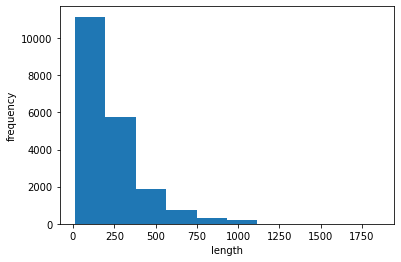

In [ ]:
plt.hist(lengths)
plt.xlabel('length')
plt.ylabel('frequency')

plt.show()

## 패딩

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

xtrain_seq = pad_sequences(
    xtrain
    , maxlen=100    # 100↓ → 0 추가 & 100↑ → 100 )
    , truncating = 'post'    # 앞: pre, 뒤: post
    )

xval_seq = pad_sequences(
    xval
    , maxlen=100    # 100↓ → 0 추가 & 100↑ → 100 )
    , truncating = 'post'    # 앞: pre, 뒤: post
    )  

In [ ]:
xtrain_seq.shape  # 리뷰 길이: 100

(20000, 100)

In [ ]:
xtrain_seq[0]  # 1번째 리뷰

array([  1,  73,  89,  81,  25,  60,   2,   6,  20, 141,  17,  14,  31,
       127,  12,  60,  28,   2,   2,  66,  45,   6,  20,  15, 497,   8,
        79,  17, 491,   8, 112,   6,   2,  20,  17,   2,   2,   4, 436,
        20,   9,   2,   6,   2,   7, 493,   2,   6, 185, 250,  24,  55,
         2,   5,  23, 350,   7,  15,  82,  24,  15,   2,  66,  10,  10,
        45,   2,  15,   4,  20,   2,   8,  30,  17,   2,   5,   2,  17,
         2, 190,   4,  20,   9,  43,  32,  99,   2,  18,  15,   8, 157,
        46,  17,   2,   4,   2,   5,   2,   9,  32], dtype=int32)

In [ ]:
xtrain[0][-10:]  # 앞 부분 잘림

[6, 2, 46, 7, 14, 20, 10, 10, 470, 158]

In [ ]:
# 6번째 리뷰
xtrain_seq[5]

array([  0,   0,   0,   0,   1,   2, 195,  19,  49,   2,   2, 190,   4,
         2, 352,   2, 183,  10,  10,  13,  82,  79,   4,   2,  36,  71,
       269,   8,   2,  25,  19,  49,   7,   4,   2,   2,   2,   2,   2,
        10,  10,  48,  25,  40,   2,  11,   2,   2,  40,   2,   2,   5,
         4,   2,   2,  95,  14, 238,  56, 129,   2,  10,  10,  21,   2,
        94, 364, 352,   2,   2,  11, 190,  24, 484,   2,   7,  94, 205,
       405,  10,  10,  87,   2,  34,  49,   2,   7,   2,   2,   2,   2,
         2, 290,   2,  46,  48,  64,  18,   4,   2], dtype=int32)

# 순환 신경망: 원-핫 인코딩

In [ ]:
# 확인용( 원-핫 인코딩 )
xtrain_oh = keras.utils.to_categorical(xtrain_seq)
xval_oh = keras.utils.to_categorical(xval_seq)

print( xtrain_oh.shape, xval_oh.shape )
xtrain_oh[0][0][:12]  # 첫 번째 토큰

(20000, 100, 500) (5000, 100, 500)


In [ ]:
model = keras.Sequential( name='모델 이름' )    # 모델 생성

# 순환층 추가
model.add(
    keras.layers.SimpleRNN(
    8
    , activation='tanh'    # 활성화 함수(하이퍼볼릭 탄젠트)
#   , dropout = 드롭아웃 비율
    , return_sequences = False    # 타임스텝 은닉 상태(출력: True)
    , input_shape = (100, 500)
    )
)

# 출력층(분류)
model.add(
    keras.layers.Dense(
    1
    , activation = 'sigmoid'    # 활성화 함수(소프트맥스/시그모이드)
    )
)

In [ ]:
# 모델 정보
model.summary()

###############
# 층 이름(종류)    출력층 크기( 미니 배치 샘플 개수, 층 뉴런 개수 )    파라미터 개수

# 전체 파라미터 개수
# 훈련 파라미터 개수
# 훈련X 파라미터 개수
###############

Model: "모델 이름"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 8)                 4072      
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 4,081
Trainable params: 4,081
Non-trainable params: 0
_________________________________________________________________


In [ ]:
rms = keras.optimizers.RMSprop(
    learning_rate = 1e-4    # 학습률
    , rho = 0.9              # 지수 감소 비율
    )

# 모델 설정
model.compile(
#    loss = 'sparse_binary/categorical_crossentropy'    # 손실 함수(원-핫 인코딩 + 이진/다중 분류)
   loss = 'binary_crossentropy'           # 손실 함수(이진/다중 분류)
    , metrics = ['accuracy']                             # 성능 지표(정확도)
   , optimizer = rms
#    , optimizer = '옵티마이저'
    )

# 최적화 값 저장
mc = keras.callbacks.ModelCheckpoint(
    'best-simpleRNN-model.h5'                  # 모델
    , monitor = 'val_loss'         # 성능 지표
    , save_weights_only = False    # 전체(True: 가중치＆절편)
    , save_best_only = True        # 가장 낮은 검증 점수  
    )

# 조기 종료
es = keras.callbacks.EarlyStopping(
    monitor = 'val_loss'    # 성능 지표
    , patience = 3          # 성능 지표가 향상 되지 않는 최대 에포크 횟수
    , restore_best_weights = True    # 최적화 가중치 복원
    )

# early_stopping_cb.stopped_epoch    # 조기 종료 에포크 횟수

# 모델 학습(경사 하강법)

history = model.fit(
    xtrain_oh, ytrain
    , epochs = 100
    , batch_size = 64    # 미니배치 샘플 개수(32)
    , verbose = 1          # 훈련 과정( 0: 생략, 2: 진행 막대 생략 )
    , validation_data = (xval_oh, yval)    # 검증 데이터 - 손실, 정확도 추가
    , callbacks = [mc, es]    # 콜백
    )

# 훈련 데이터 - 손실, 정확도

model.evaluate(xval_oh, yval)    # 검증 데이터 - 손실, 정확도

# history.history.keys()    # 성능 지표 목록(손실, 정확도)

# 순환 신경망: 단어 임베딩

In [ ]:
model = keras.Sequential( name='Recurrent' )    # 모델 생성

model.add(keras.layers.Embedding(
    500    # 어휘 사전 크기(=개수)
    , 16    # 임베딩 벡터 크기
    , input_length = 100  # 패딩
    )
)

model.add(keras.layers.SimpleRNN(8))

# 출력층 추가
model.add(
    keras.layers.Dense(
        1
        , activation='sigmoid'
        )
    )

# 모델 정보
model.summary()

###############
# 층 이름(종류)    출력 크기(미니 배치 샘플 개수, 뉴런 개수)    파라미터 개수 = ( (특성)뉴런 개수+1 ) X 뉴런 개수

# 전체 파라미터 개수
# 훈련 파라미터 개수
# 훈련X 파라미터 개수
###############

NameError: ignored

In [ ]:
rms = keras.optimizers.RMSprop(
    learning_rate = 1e-4    # 학습률
    , rho = 0.9              # 지수 감소 비율
    )

# 모델 설정
model.compile(
#    loss = 'sparse_binary/categorical_crossentropy'    # 손실 함수(원-핫 인코딩 + 이진/다중 분류)
   loss = 'binary_crossentropy'           # 손실 함수(이진/다중 분류)
    , metrics = ['accuracy']                             # 성능 지표(정확도)
   , optimizer = rms
#    , optimizer = '옵티마이저'
    )

# 최적화 값 저장
mc = keras.callbacks.ModelCheckpoint(
    'best-simpleRNN-model.h5'                  # 모델
    , monitor = 'val_loss'         # 성능 지표
    , save_weights_only = False    # 전체(True: 가중치＆절편)
    , save_best_only = True        # 가장 낮은 검증 점수  
    )

# 조기 종료
es = keras.callbacks.EarlyStopping(
    monitor = 'val_loss'    # 성능 지표
    , patience = 3          # 성능 지표가 향상 되지 않는 최대 에포크 횟수
    , restore_best_weights = True    # 최적화 가중치 복원
    )

# early_stopping_cb.stopped_epoch    # 조기 종료 에포크 횟수

# 모델 학습(경사 하강법)

history = model.fit(
    xtrain_seq, ytrain
    , epochs = 100
    , batch_size = 64    # 미니배치 샘플 개수(32)
    , verbose = 1          # 훈련 과정( 0: 생략, 2: 진행 막대 생략 )
    , validation_data = (xval_seq, yval)    # 검증 데이터 - 손실, 정확도 추가
    , callbacks = [mc, es]    # 콜백
    )

# 훈련 데이터 - 손실, 정확도

model.evaluate(xval_seq, yval)    # 검증 데이터 - 손실, 정확도

# history.history.keys()    # 성능 지표 목록(손실, 정확도)

NameError: ignored

### 그래프

In [ ]:
# 손실
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

NameError: ignored